# Setting up the network examples 

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Graph_A = nx.DiGraph()
Graph_B = nx.DiGraph()
Graph_C = nx.DiGraph()
Nodes = range(1,6)
Edges_OK = [(1,2),(1,3),(2,3),(3,1),(3,2),(3,4),(4,5),
            (4,6),(5,4),(5,6),(6,5),(6,1)]
Edges_dead_end = [(1,2),(1,3),(3,1),(3,2),(3,4),(4,5),
                  (4,6),(5,4),(5,6),(6,5),(6,1)]
Edges_trap = [(1,2),(1,3),(2,3),(3,1),(3,2),(3,4),(4,5),
              (4,6),(5,4),(5,6),(6,5)]
Graph_A.add_nodes_from(Nodes)
Graph_A.add_edges_from(Edges_OK)
Graph_B.add_nodes_from(Nodes)
Graph_B.add_edges_from(Edges_dead_end)
Graph_C.add_nodes_from(Nodes)
Graph_C.add_edges_from(Edges_trap)

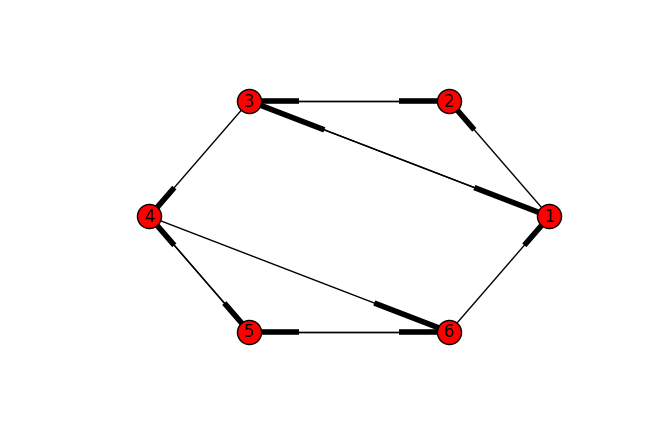

In [3]:
np.random.seed(2)
pos=nx.shell_layout(Graph_A)
nx.draw(Graph_A, pos, arrows=True, with_labels=True)
plt.show()

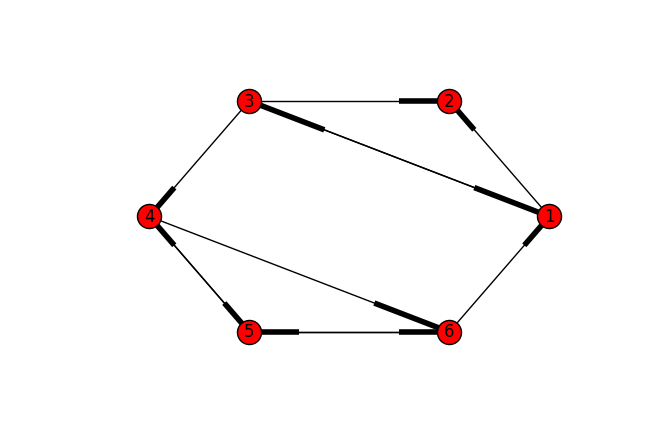

In [4]:
np.random.seed(2)
pos=nx.shell_layout(Graph_B)
nx.draw(Graph_B, pos, arrows=True, with_labels=True)
plt.show()

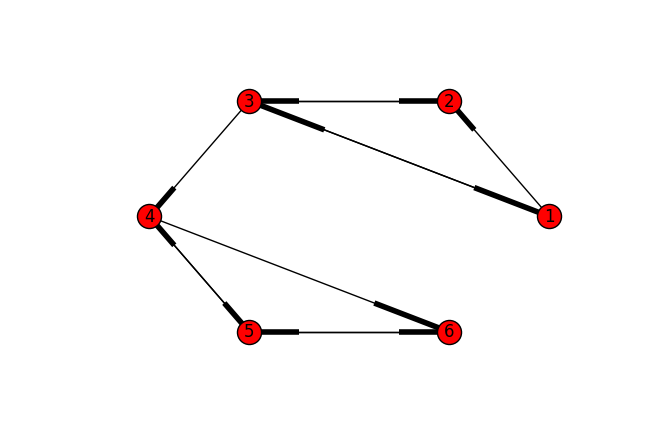

In [5]:
np.random.seed(2)
pos=nx.shell_layout(Graph_C)
nx.draw(Graph_C, pos, arrows=True, with_labels=True)
plt.show()

# A PageRank's naive implementation

In [6]:
def initialize_PageRank(graph):
    nodes = len(graph)
    M = nx.to_numpy_matrix(graph)
    outbound = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outbound = np.array(
        [1.0/count 
         if count>0 else 0.0 for count in outbound])
    G = np.asarray(np.multiply(M.T, prob_outbound))
    p = np.ones(nodes) / float(nodes)
    if np.min(np.sum(G,axis=0)) < 1.0:
        print ('Warning: G is substochastic')
    return G, p

In [7]:
G, p = initialize_PageRank(Graph_A)
print (G)

[[ 0.          0.          0.33333333  0.          0.          0.5       ]
 [ 0.5         0.          0.33333333  0.          0.          0.        ]
 [ 0.5         1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.5         0.        ]
 [ 0.          0.          0.          0.5         0.          0.5       ]
 [ 0.          0.          0.          0.5         0.5         0.        ]]


In [8]:
from scipy import sparse
sG = sparse.csr_matrix(G)
print (sG)

  (0, 2)	0.333333333333
  (0, 5)	0.5
  (1, 0)	0.5
  (1, 2)	0.333333333333
  (2, 0)	0.5
  (2, 1)	1.0
  (3, 2)	0.333333333333
  (3, 4)	0.5
  (4, 3)	0.5
  (4, 5)	0.5
  (5, 3)	0.5
  (5, 4)	0.5


In [9]:
print(p)

[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]


In [10]:
print(np.dot(G,p))

[ 0.13888889  0.13888889  0.25        0.13888889  0.16666667  0.16666667]


# Introducing boredom

In [11]:
def PageRank_naive(graph, iters = 50):
    G, p = initialize_PageRank(graph)
    for i in range(iters):
        p = np.dot(G,p)
    return np.round(p,3)

print(PageRank_naive(Graph_A))

[ 0.154  0.154  0.231  0.154  0.154  0.154]


In [12]:
print(PageRank_naive(Graph_B))

[ 0.  0.  0.  0.  0.  0.]


In [13]:
print(PageRank_naive(Graph_C))

[ 0.     0.     0.     0.222  0.444  0.333]


In [14]:
def PageRank_teleporting(graph, iters = 50, alpha=0.85, 
                         rounding=3):
    G, p = initialize_PageRank(graph)
    u = np.ones(len(p)) / float(len(p))
    for i in range(iters):
        p = alpha * np.dot(G,p) + (1.0 - alpha) * u
    return np.round(p / np.sum(p), rounding)

print('Graph A:', PageRank_teleporting(Graph_A, 
                                    rounding=8))
print('Graph B:', PageRank_teleporting(Graph_B, 
                                    rounding=8))
print('Graph C:', PageRank_teleporting(Graph_C, 
                                    rounding=8))

Graph A: [ 0.15477863  0.15346061  0.22122243  0.15477863  0.15787985  0.15787985]
Graph B: [ 0.16502904  0.14922238  0.11627717  0.16502904  0.20222118  0.20222118]
Graph C: [ 0.0598128   0.08523323  0.12286869  0.18996342  0.30623677  0.23588508]


In [15]:
# http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html
nx.pagerank(Graph_A, alpha=0.85)

{1: 0.15477892494151968,
 2: 0.1534602056628941,
 3: 0.2212224378270561,
 4: 0.15477892494151968,
 5: 0.1578797533135051,
 6: 0.15787975331350507}